# Trabajo práctico Nº5: Vía Láctea: cúmulos estelares

1) Descargue del Classroom la tabla del catálogo de Cúmulos Globulares (CG) de W. E. Harris (1996, AJ, 112, 1487), edición 2010. La tabla contiene las posiciones de los CG y la abundancia de hierro de cada uno. Recuerde que las coordenadas X,Y,Z de cada CG están dadas en un sistema rectangular centrado en el Sol, cuyo eje X apunta al centro galáctico y cuyo eje Y apunta en la dirección del movimiento solar (l = 90°).
a) Grafique (en 3D) las posiciones de todos los CG que se encuentren dentro de un cubo de 40 kpc de lado, centrado en el Sol. Señale la posición del Sol y del plano galáctico. ¿Qué información puede extraer a través de la inspección visual de este gráfico acerca de la distribución espacial de los CG?
Incluya en el informe los gráficos de las proyecciones de los cúmulos antes mencionados sobre los planos $(X,Y)$ y $(X.Z)$. Tómelos en cuenta en su argumentación.   
##### Nota: recuerde mantener la misma escala en abscisas y ordenadas en estos gráficos.
Se recomienda comenzar abriendo el archivo de datos para observar su estructura Harris2010.csv con un editor  (también se puede hacer con el comando del sistema !head Harris2010.csv ).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#text.usetex: True

#plt.style.use('sisest.mplstyle')

In [3]:
harris = pd.read_csv('Harris2010.csv', sep = ';', comment='#')
harris#.head()

,X,Y,Z,FeH
0,1.9,-2.6,-3.1,-0.72
1,-0.1,0.0,-8.9,-1.32
2,3.1,-5.1,-6.2,-1.26
3,-13.9,4.7,-26.3,-0.70
4,0.1,-10.0,-12.9,-1.27
...,...,...,...,...
152,5.6,7.5,-6.7,-1.65
153,4.9,2.5,-5.9,-2.27
154,11.0,6.5,-14.1,-0.85
155,1.0,19.1,-17.6,-1.88


In [4]:
# Hacemos una selección de los cúmulos para quedarnos con aquellos que estén a menos de 40 kpc del sol
# Todo lo que está escrito entre corchetes son condiciones. Las condiciones se delimitan con paréntesis y se separan con &'s

limite_superior = 20
limite_inferior = -20
harris40 = harris[(harris.X < limite_superior) & (harris.X > limite_inferior) & (harris.Y < limite_superior) & (harris.Y > limite_inferior) 
                  & (harris.Z < limite_superior) & (harris.Z > limite_inferior)]
harris40.describe()

,X,Y,Z,FeH
count,133.000000,133.000000,133.000000,130.000000
mean,6.763910,-0.315038,0.230827,-1.213538
std,4.292159,4.724140,5.217775,0.570490
min,-7.700000,-17.800000,-17.600000,-2.370000
25%,3.900000,-1.900000,-1.200000,-1.615000
50%,6.900000,0.100000,-0.100000,-1.275000
75%,9.300000,1.200000,1.300000,-0.725000
max,17.600000,19.100000,19.100000,0.000000


In [5]:
plt.style.use('sisest.mplstyle')
plt.style.use('dark_background')

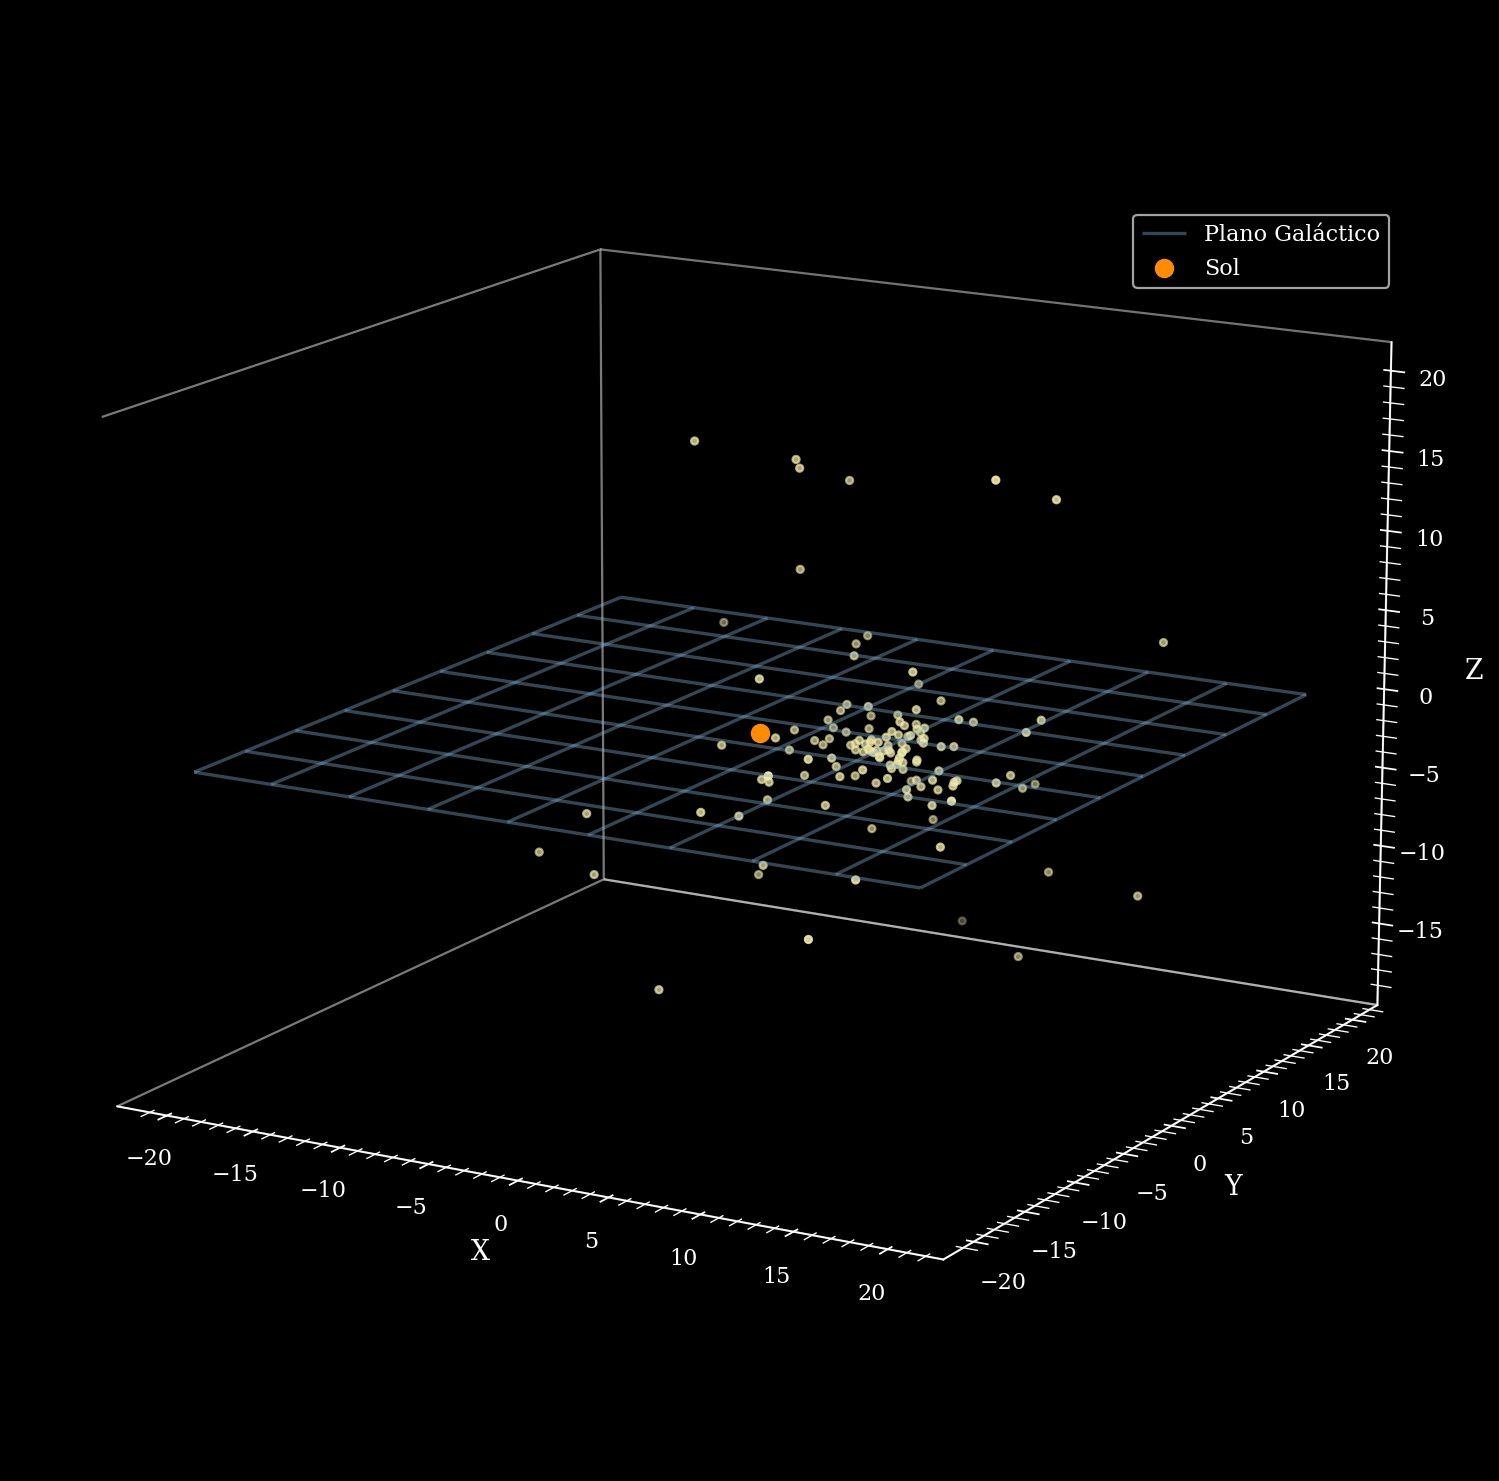

In [ ]:
%matplotlib inline
#widget para hacerlo interactivo

fig = plt.figure(figsize = (12,12), facecolor='k', dpi=160)
ax = fig.add_subplot(projection='3d')

ax.use_sticky_edges = True
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(False)


# Grilla que representa al plano Galáctico
x = np.linspace(-20,20,10)  # Arreglos de 10 puntos equiespaciados entre -20 y 20 
y = np.linspace(-20,20,10)
Xp,Yp = np.meshgrid(x,y)    # meshgrid = malla
Zp = 0 * Xp * Yp
ax.plot_wireframe(Xp,Yp,Zp, color='C4', alpha=0.4, label='Plano Galáctico')

ax.scatter(xs = 0, ys = 0, zs = 0, c = 'darkorange', s = 60, label='Sol')  # Punto que representa al Sol

ax.scatter(xs = harris40.X, 
           ys = harris40.Y, 
           zs = harris40.Z, 
           zdir = 'z', c = 'palegoldenrod', s = 10)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.azim = -60 # rotación en eje principal - ángulo azimutal
#ax.dist = 7   # 7 distancia del punto de vista al gráfico
ax.elev = 15  # elevación del punto de vista respecto al plano principal (horizontal)

ax.legend(bbox_to_anchor=(0.955, 0.87))
plt.show()

Ahora, las proyecciones en los planos XY y XZ:

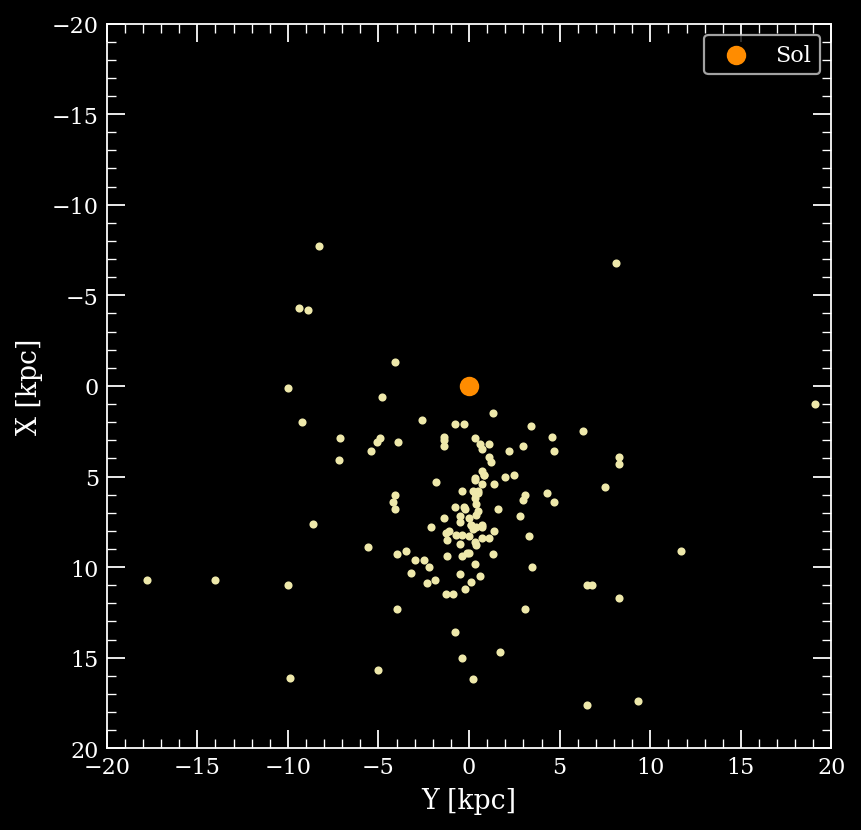

In [7]:
#Proyección XY
fig = plt.figure(figsize = (8,6), facecolor='k', dpi=160)
plt.axis('square')

plt.scatter(harris40.Y, #coord horiz
           harris40.X,
           c = 'palegoldenrod', s = 7)
plt.xlim(-20, 20) 
plt.ylim(20, -20) # Por como dibujamos normalmente las coordenadas galácticas

plt.scatter(0, 0, c = 'darkorange', s = 60, label='Sol')

plt.xlabel('Y [kpc]')
plt.ylabel('X [kpc]')

plt.legend()
plt.show()

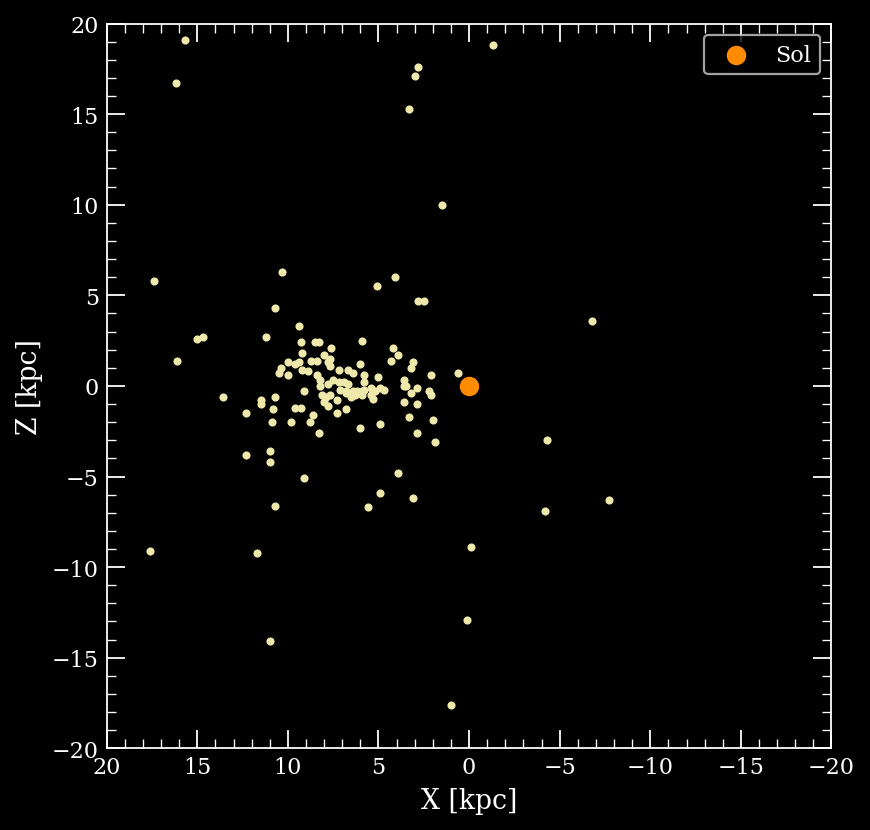

In [8]:
#Proyección XZ

fig = plt.figure(figsize = (8,6), facecolor='k', dpi=160)
plt.axis('square')

plt.scatter(harris40.X, #coord horiz
           harris40.Z,
           c = 'palegoldenrod', s = 7)

plt.xlim(20, -20) 
plt.ylim(-20, 20) # Por como dibujamos normalmente las coordenadas galácticas

plt.scatter(0, 0, c = 'darkorange', s = 60, label='Sol')

plt.xlabel('X [kpc]')
plt.ylabel('Z [kpc]')

plt.legend()
plt.show()

b) Obtenga un valor aproximado para la distancia del Sol al centro galáctico $(R_0)$ de la siguiente forma:

i) Calcule los valores medios $<X_0>$, $<Y_0>$, $<Z_0>$ y las dispersiones1 $\sigma_X$ , $\sigma_Y$ y $\sigma_Z$ de las coordenadas $X, Y$ y $Z$.

In [9]:
# Los valores medios de las coordenadas y sus dispersiones van a estar dadas por:

print(r'$<X_0> =$', harris.X.mean(), r'$\sigma_X =$', harris.X.std())

print('\n$<Y_0> =$', harris.Y.mean(), r'$\sigma_Y =$', harris.Y.std())

print('\n$<Z_0> =$', harris.Z.mean(), r'$\sigma_Z =$', harris.Z.std())

$<X_0> =$ 6.0140127388535 $\sigma_X =$ 12.671993441012651

$<Y_0> =$ -1.3777070063694246 $\sigma_Y =$ 11.298568089024478

$<Z_0> =$ 1.1484076433121 $\sigma_Z =$ 15.906338863418261


ii) Seleccione los cúmulos que tengan $|X - <X_0>| < 2\sigma_X$ , $|Y - <Y_0>| < 2\sigma_Y$ y $|Z - <Z_0>| < 2\sigma_X$ . Para esos cúmulos recalcule el valor medio de las coordenadas $<X_1>$, $<Z_1>$ y $<Z_1>$. En base a estos resultados, indique cuál serı́a la distancia más probable del Sol al centro Galáctico, ası́ como sus coordenadas $Y_C$ , $Z_C$ . Analice si los resultados obtenidos son compatibles con sus conocimientos acerca de la posición del centro galáctico.
##### Nota: en este paso es muy importante combinar correctamente las condiciones de selección en los tres ejes.

In [10]:
def dist_media(x, xm):  #Acá, xm va a ser el valor promedio de todas las distancias (los .mean())
    return abs(x-xm)

harris_sel = harris[(dist_media(harris.X, harris.X.mean())< 2 * harris.X.std()) & # Selección de cúmulos bajo el criterio de 2 sigma 
                    (dist_media(harris.Y, harris.Y.mean())< 2 * harris.X.std()) &
                    (dist_media(harris.Z, harris.Z.mean())< 2 * harris.X.std()) ]

# Vuelvo a calcular las coordenadas medias y sus sigma:
X0 = harris_sel.X.mean() # Lo consideramos como la distancia al CG (R0)

print('$<R_0> =$', X0, '$\sigma R_0 =$', harris_sel.X.std())

print('\n$<Y_0> =$', harris_sel.Y.mean(), '$\sigma_Y =$', harris_sel.Y.std())

print('\n$<Z_0> =$', harris_sel.Z.mean(), '$\sigma_Z =$', harris_sel.Z.std())

$<R_0> =$ 7.829166666666661 $\sigma R_0 =$ 5.874430488688548

$<Y_0> =$ -0.30069444444444454 $\sigma_Y =$ 5.501322110994772

$<Z_0> =$ 0.2840277777777778 $\sigma_Z =$ 6.3114687838104055


c) Calcule y grafique un histograma de metalicidades para los CG de la Vı́a Láctea. Utilice intervalos de metalicidad $\Delta[Fe/H]$ = 0.1 dex, y centre el primer conteo en $[Fe/H]$ = −2.5. Elija luego un valor de $[Fe/H]$ que le permita separar las poblaciones de CG de alta y de baja metalicidad (“rojos” y “azules”).

In [11]:
plt.style.use('default')
plt.style.use('sisest.mplstyle')

Text(0, 0.5, 'N')

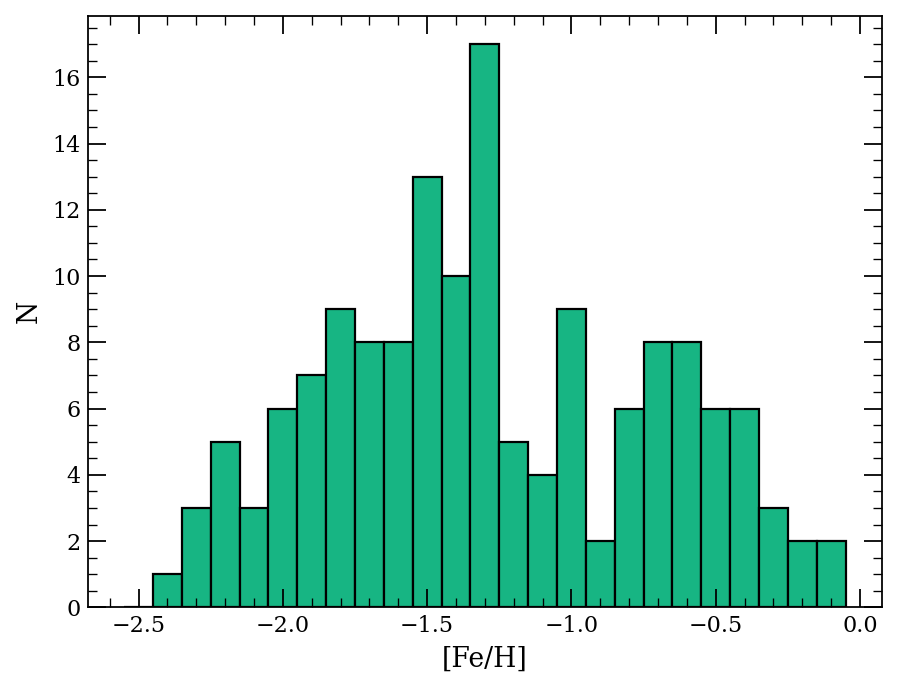

In [12]:
bines = np.arange(-2.55, 0.05, 0.1)

fig = plt.figure(facecolor='w', dpi=160)

# el argumento bins de la función hist (histograma) indica el los bordes de los bines
# el argumento align='mid' indica que las barras del histograma se centran en el punto central de cada bin
# align centra, pone a izquierda o pone a derecha del valor medio los bines

hist = plt.hist(harris.FeH, bins=bines, align='mid', edgecolor='0',facecolor='#17B583') #(23, 181, 131)/255
plt.xlabel('[Fe/H]')
plt.ylabel('N')

In [13]:
harris['color'] = ['orangered' if variable_metalicidad > -0.9 else 'deepskyblue' for variable_metalicidad in harris['FeH']]
#harris #La columna color nos va a servir para después volver a graficar los cúmulos pero con su color respectivo
harris40['color'] = ['orangered' if variable_metalicidad > -0.9 else 'deepskyblue' for variable_metalicidad in harris40['FeH']]
#harris40

<ipython-input-13-acf09d23b40b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  harris40['color'] = ['orangered' if variable_metalicidad > -0.9 else 'deepskyblue' for variable_metalicidad in harris40['FeH']]


d ) Repita los gráficos de la parte 1.a) pero seleccionando un cubo de 40 kpc de lado centrado en la posición del centro Galáctico calculado en 1.b). Distinga con sı́mbolos diferentes a los CG de acuerdo a las poblaciones identificadadas en 1.c). Señale la posición del Sol y del centro Galáctico. Describa las distribuciones espaciales de los CG en general y de cada una de las poblaciones.

In [14]:
plt.style.use('dark_background')

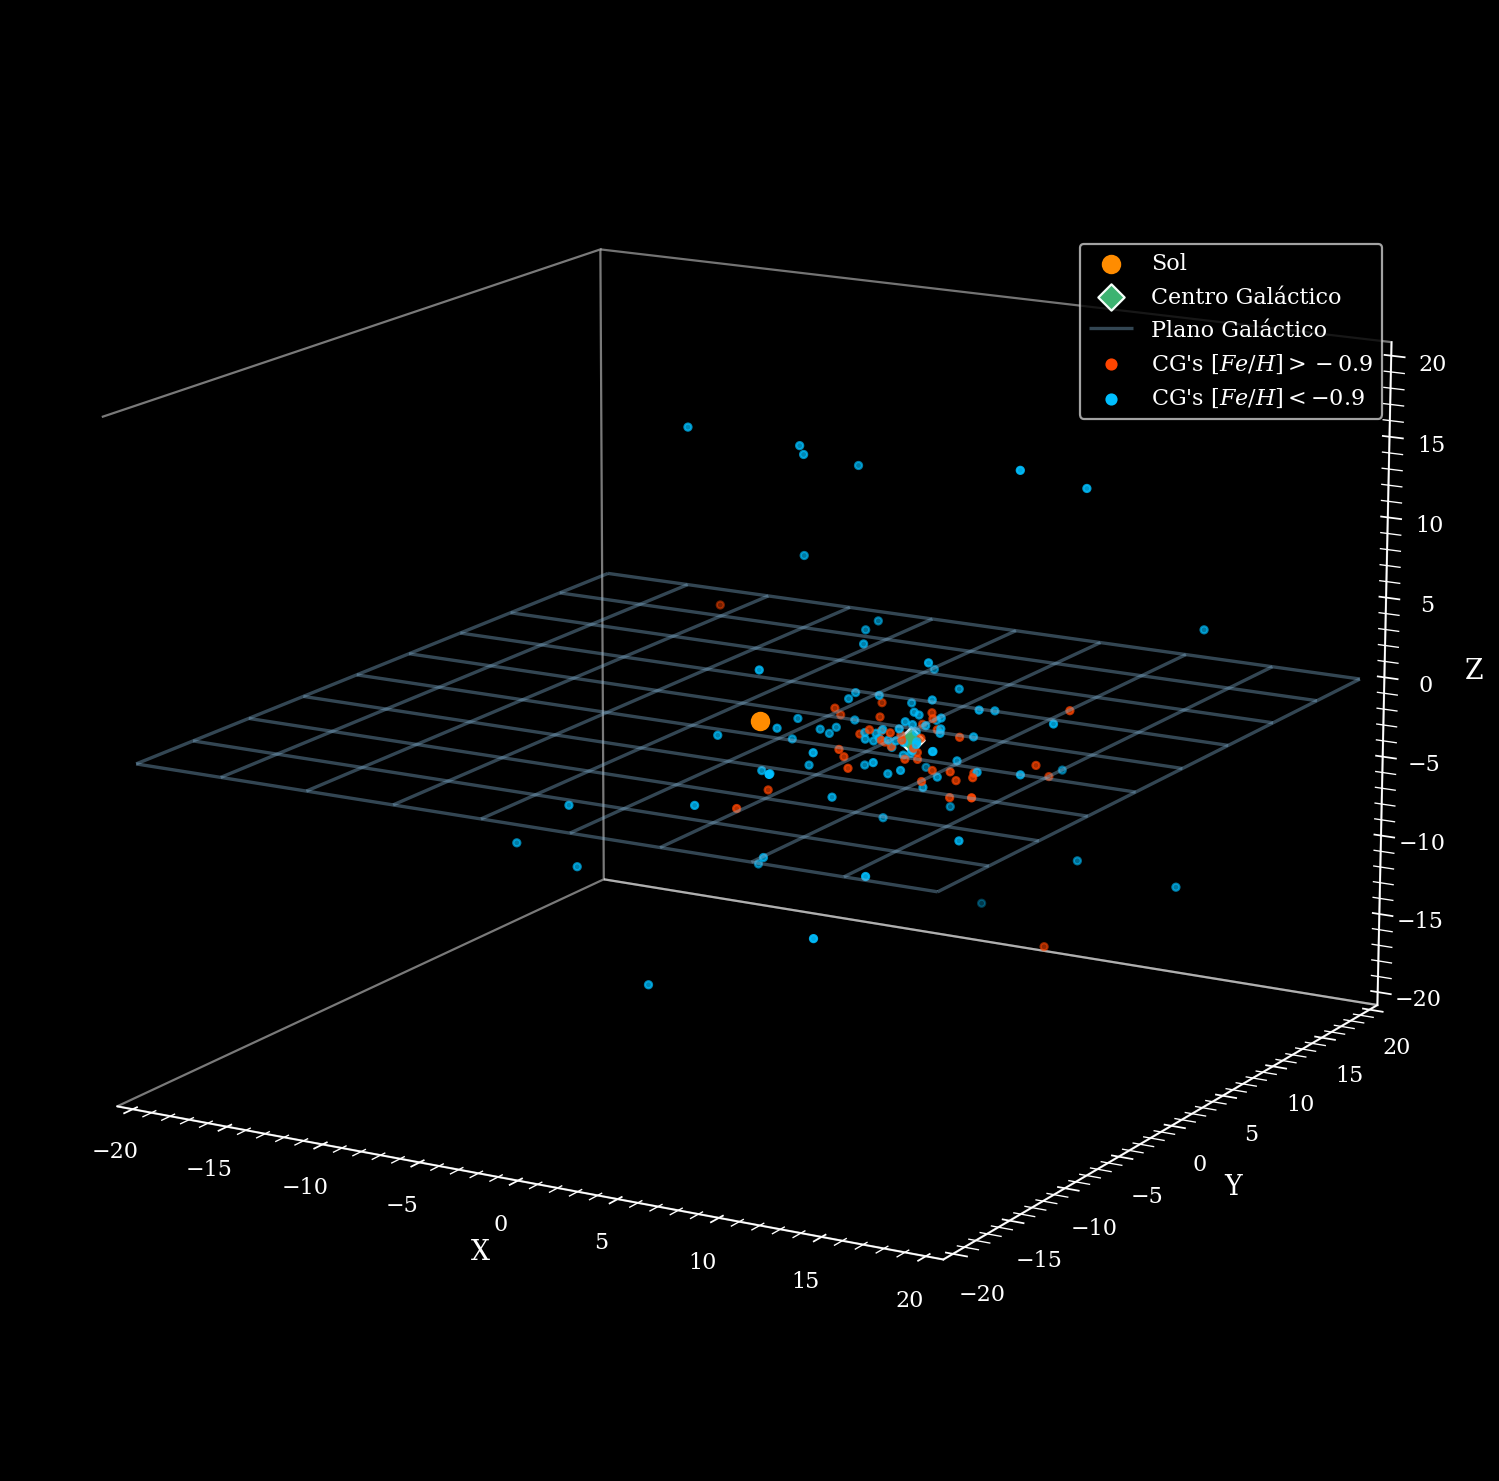

In [15]:
%matplotlib inline

fig = plt.figure(figsize = (12,12), facecolor='k', dpi=160)
ax = fig.add_subplot(projection='3d')

ax.use_sticky_edges = True
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(False)

ax.scatter(xs = 0, ys = 0, zs = 0, c = 'darkorange', s = 60, label='Sol')
ax.scatter(xs = X0, ys = harris_sel.Y.mean(), zs = harris_sel.Z.mean(), c = 'mediumseagreen', edgecolor='mintcream',
           s = 70, label='Centro Galáctico', marker='D')

# Grilla que representa al plano Galáctico
x = np.linspace(-20,20,10)  # Arreglos de 10 puntos equiespaciados entre -20 y 20 
y = np.linspace(-20,20,10)
Xp,Yp = np.meshgrid(x,y)    # meshgrid = malla
Zp = 0 * Xp * Yp
ax.plot_wireframe(Xp,Yp,Zp, color='C4', alpha=0.4, label='Plano Galáctico')

ax.scatter(xs = harris40.X, ys = harris40.Y, zs = harris40.Z, zdir = 'z', c = harris40.color, s = 10)

ax.scatter(50,-30,-40, color='orangered', label='CG\'s $[Fe/H]>-0.9$') # Datos falsos para las etiquetas
ax.scatter(50,-30,-40, color='deepskyblue', label='CG\'s $[Fe/H]<-0.9$')

ax.set_xlim(-20, 20) 
ax.set_ylim(-20, 20)
ax.set_zlim(-20, 20)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.azim = -60 # rotación en eje principal - ángulo azimutal
#ax.dist = 7   # 7 distancia del punto de vista al gráfico
ax.elev = 15  # elevación del punto de vista respecto al plano principal (horizontal)

ax.legend(bbox_to_anchor=(0.95, 0.85))
plt.show()

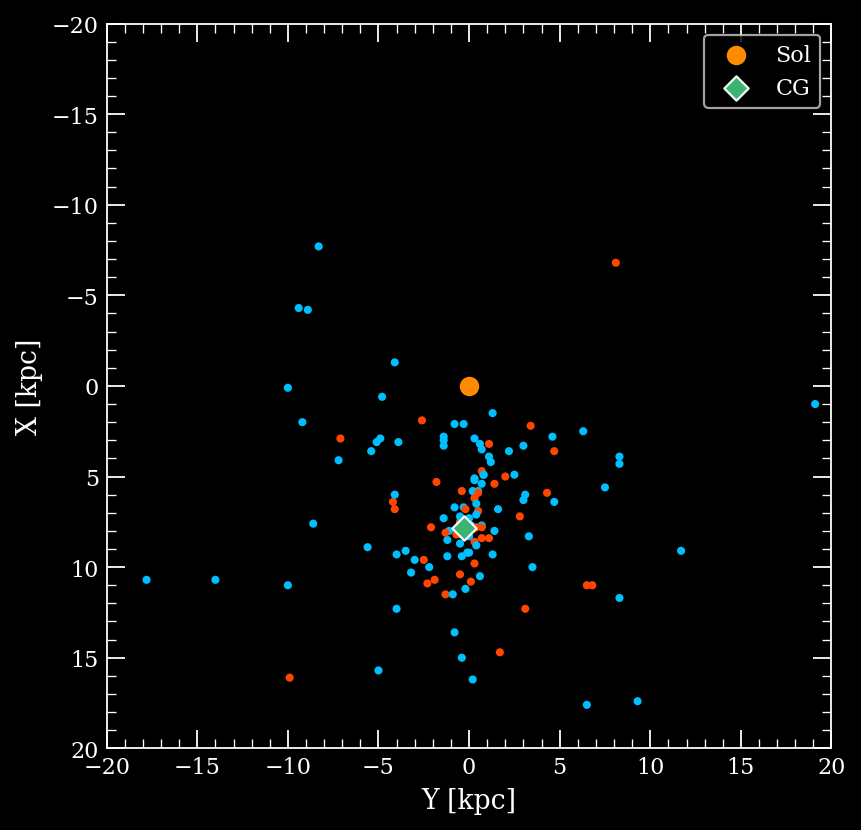

In [16]:
#Proyección XY
fig = plt.figure(figsize = (8,6), facecolor='k', dpi=160)
plt.axis('square')

plt.scatter(harris40.Y, harris40.X, c = harris40.color, s = 7)
plt.xlim(-20, 20) 
plt.ylim(20, -20) # Por como dibujamos normalmente las coordenadas galácticas

plt.scatter(0, 0, c = 'darkorange', s = 60, label='Sol')
plt.scatter(harris_sel.Y.mean(), X0, c = 'mediumseagreen',edgecolor='mintcream', s = 60, marker='D', label='CG')


plt.xlabel('Y [kpc]')
plt.ylabel('X [kpc]')

plt.legend()
plt.show()

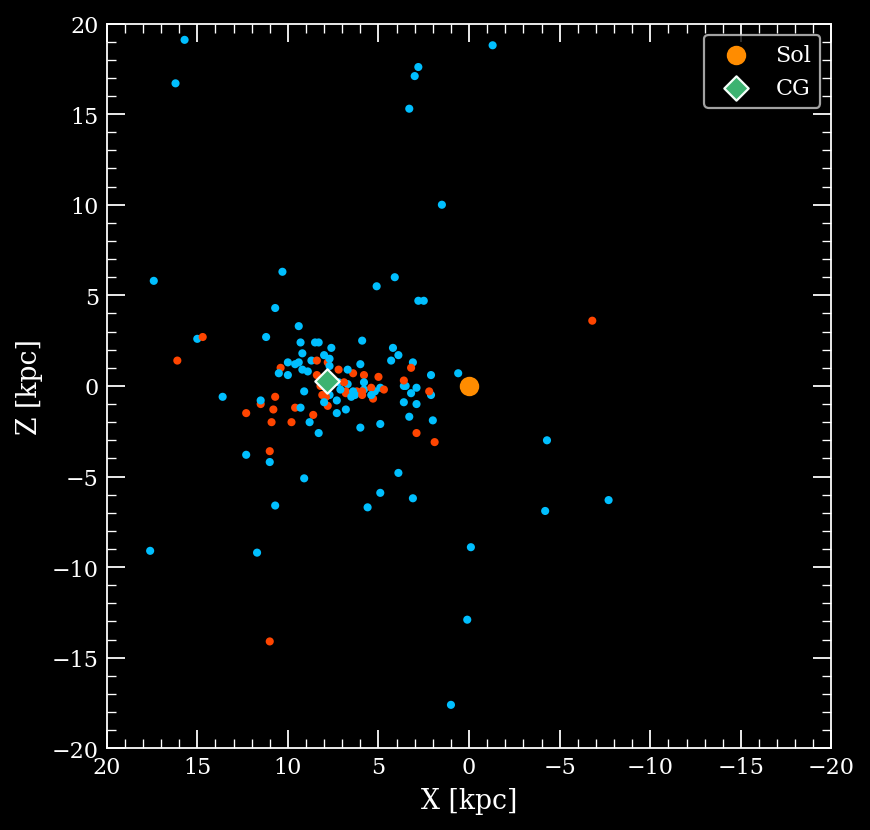

In [17]:
#Proyección XZ

fig = plt.figure(figsize = (8,6), facecolor='k', dpi=160)
plt.axis('square')

plt.scatter(harris40.X, #coord horiz
           harris40.Z,
           c = harris40.color, s = 7)

plt.xlim(20, -20) 
plt.ylim(-20, 20) # Por como dibujamos normalmente las coordenadas galácticas

plt.scatter(0, 0, c = 'darkorange', s = 60, label='Sol')
plt.scatter(X0, harris_sel.Z.mean(), c = 'mediumseagreen', edgecolor='mintcream', s = 60, marker='D', label='CG')


plt.xlabel('X [kpc]')
plt.ylabel('Z [kpc]')

plt.legend()
plt.show()

2. Descargue del Classroom la última versión del Catálogo de Cúmulos Abiertos Ópticamente Visibles de W. S. Dias et al. (2002, A&A, 387, 871) (archivo Dias2002 15comp.dat). Utilizando los datos del catálogo, haga lo siguiente:

a) Para todos los cúmulos con distancia al Sol conocida, calcule sus coordenadas $X, Y, Z$ en el mismo sistema rectangular ejercicio anterior. Grafique $X$ contra $Y$ , $Z$ contra $X$, y $Z$ contra $Y$ ; en los dos primeros gráficos, ubique la posición del centro Galáctico. Describa la distribución espacial observada de los cúmulos abiertos en la Galaxia y los efectos que pueden estar afectando a la distribución observada.

In [18]:
dias = pd.read_csv('Dias2002_15comp.csv', sep = ';', comment='#')
dias['X'] = dias.d*np.cos(dias.b*np.pi/180.)*np.cos(dias.l*np.pi/180.)/1000. #para pasar las unidades a kpc
dias['Y'] = dias.d*np.cos(dias.b*np.pi/180.)*np.sin(dias.l*np.pi/180.)/1000.
dias['Z'] = dias.d*np.sin(dias.b*np.pi/180.)/1000.
dias.describe()

,l,b,d,Age,X,Y,Z
count,2040.000000,2040.000000,2040.000000,2013.000000,2040.000000,2040.000000,2040.000000
mean,192.403149,-0.867935,2289.506373,8.330278,-0.268384,-0.236960,-0.022399
std,98.661786,8.276134,1811.296615,0.817773,1.817409,2.241374,0.264064
min,0.009360,-79.261180,25.000000,6.000000,-14.005986,-12.806287,-2.508140
25%,108.212608,-2.611860,1147.500000,7.850000,-1.172277,-1.328380,-0.083582
50%,206.250705,-0.409170,1800.000000,8.500000,-0.099234,-0.279382,-0.012056
75%,277.828975,1.615753,2818.000000,8.950000,0.770217,0.989799,0.045485
max,359.994210,84.591360,14871.000000,10.100000,8.148999,14.462756,2.075999


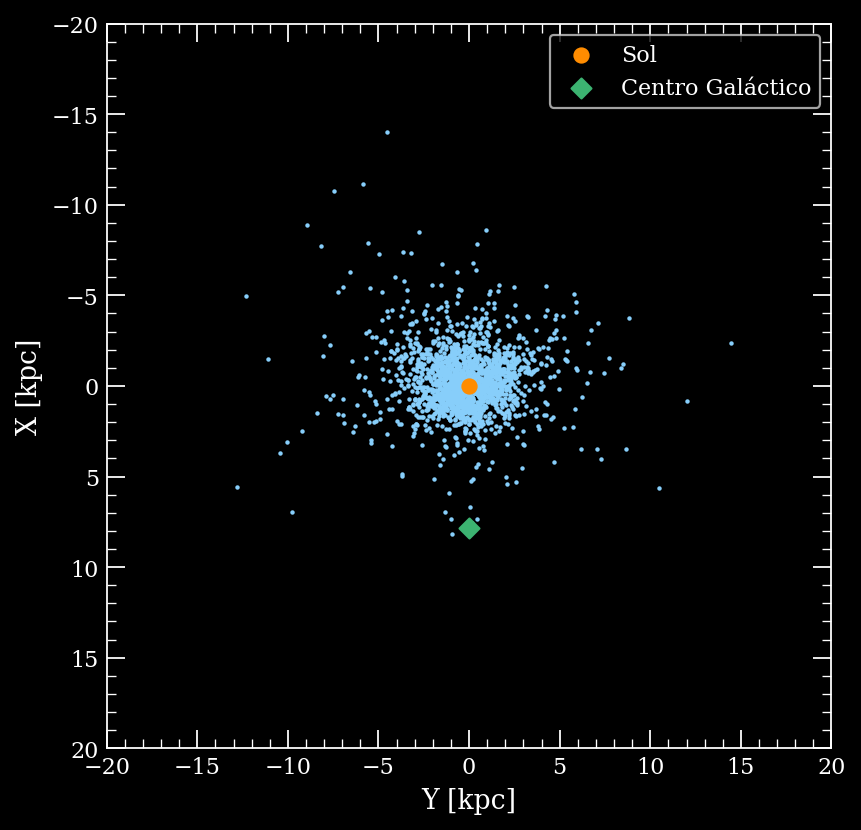

In [19]:
fig = plt.figure(figsize = (8,6), facecolor='k', dpi=160)
plt.axis('square')

plt.scatter(dias.Y, dias.X, c = 'lightskyblue', s = 1)
plt.xlim(-20, 20) 
plt.ylim(20, -20)

plt.scatter(0, 0, c = 'darkorange', s = 40, label= 'Sol')
plt.scatter(0, X0, c = 'mediumseagreen', s = 40, marker='D', label= 'Centro Galáctico')

plt.xlabel('Y [kpc]')
plt.ylabel('X [kpc]')

plt.legend()
plt.show()

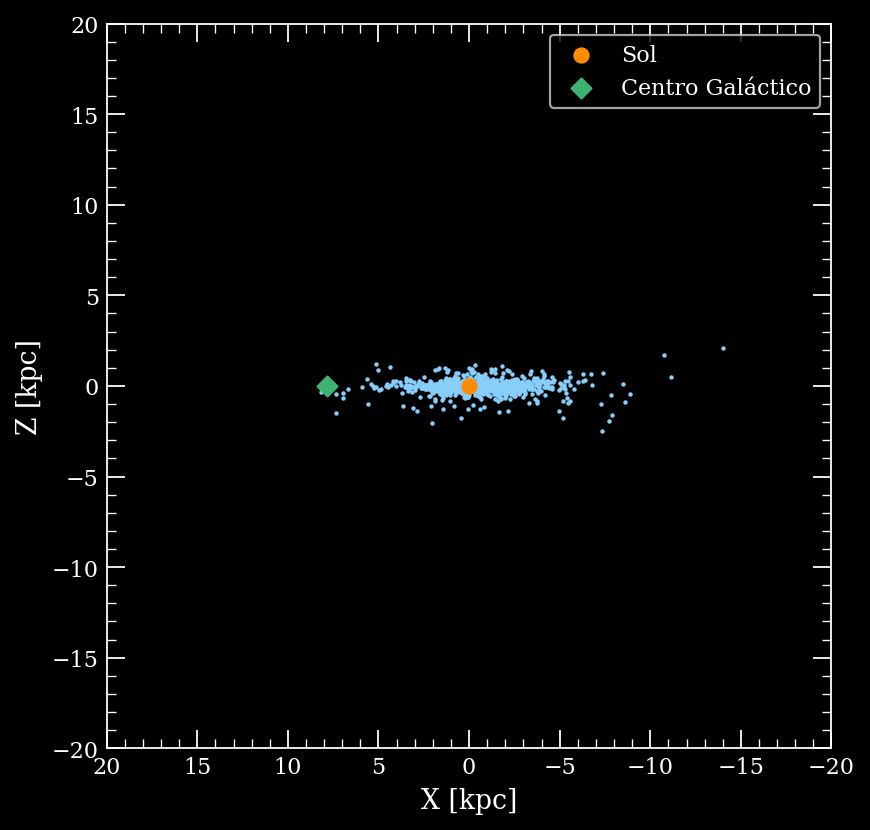

In [20]:
fig = plt.figure(figsize = (8,6), facecolor='k', dpi=160)
plt.axis('square')

plt.scatter(dias.X, dias.Z, c = 'lightskyblue', s = 1)
plt.xlim(20, -20) 
plt.ylim(-20, 20)

plt.scatter(0, 0, c = 'darkorange', s = 40, label= 'Sol')
plt.scatter(X0, 0, c = 'mediumseagreen', s = 40, marker='D', label= 'Centro Galáctico')

plt.xlabel('X [kpc]')
plt.ylabel('Z [kpc]')

plt.legend()
plt.show()

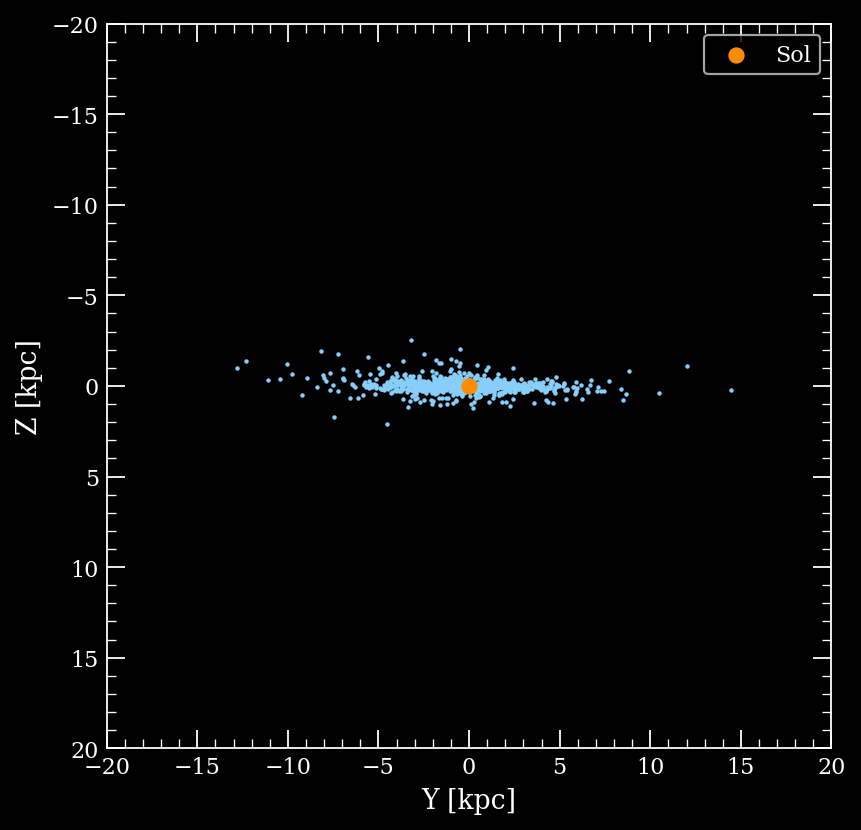

In [ ]:
fig = plt.figure(figsize = (8,6), facecolor='k', dpi=160)
plt.axis('square')

plt.scatter(dias.Y, dias.Z, c = 'lightskyblue', s = 1)
plt.xlim(-20, 20) 
plt.ylim(20, -20)

plt.scatter(0, 0, color = 'darkorange', s = 40, label= 'Sol')

plt.xlabel('Y [kpc]')
plt.ylabel('Z [kpc]')

plt.legend()
plt.show()

#### 2. b) Repita el gráfico $X$ contra $Y$, pero limitado a los cúmulos que se encuentren a una distancia de menos de 5 kpc  del Sol, tengan más de 10 miembros estimados, exista fotometría, no sean dudosos, ni posibles cúmulos globulares, ni posibles asterismos, ni objetos no encontrados en el Digital Sky Survey (DSS). Los mismos se encuentran en el archivo $\texttt{Dias2002_15sel.dat}$. 

#### Agrupe los cúmulos en los siguientes rangos de edades (haciendo un gráfico para cada grupo):
\begin{eqnarray}
 & \log (t) & \le 7.0 \\
 & \log (t) & \le 7.5  \\
7.5 < & \log (t) & \le 8.0 \\ 
8.0 < & \log (t) & \\
\end{eqnarray}
   
#### Describa las distribuciones espaciales que se obtienen; considere para ello la estructura de la Galaxia (ver figura $\texttt{MW_map.jpg}$ en el Classroom) y las condiciones que deben cumplir los trazadores de la estructura espiral.

In [22]:
dias_sel = pd.read_csv('Dias2002_15sel.csv', sep = ';', comment='#')

dias_sel['X'] = dias_sel.d*np.cos(dias_sel.b*np.pi/180.)*np.cos(dias_sel.l*np.pi/180.)/1000. #para pasar las unidades a kpc
dias_sel['Y'] = dias_sel.d*np.cos(dias_sel.b*np.pi/180.)*np.sin(dias_sel.l*np.pi/180.)/1000.
dias_sel['Z'] = dias_sel.d*np.sin(dias_sel.b*np.pi/180.)/1000.

dias_sel.describe()

,l,b,d,Age,FeH,eFeH,X,Y,Z
count,391.000000,391.000000,391.000000,389.000000,160.000000,145.000000,391.000000,391.000000,391.000000
mean,206.066602,-0.924936,1849.097187,8.012951,-0.081038,0.083124,-0.287108,-0.296545,-0.016191
std,95.367581,7.493238,1039.058941,0.824702,0.230152,0.069828,1.298407,1.616817,0.191162
min,7.085890,-79.261180,161.000000,6.000000,-1.544000,0.002000,-4.110151,-4.710831,-1.378651
25%,121.989615,-2.402360,1032.000000,7.368000,-0.170000,0.030000,-1.165233,-1.403518,-0.072653
50%,228.414610,-0.490080,1696.000000,8.036000,-0.019000,0.070000,-0.180863,-0.436155,-0.012753
75%,286.223040,1.186495,2490.000000,8.600000,0.060000,0.110000,0.705117,0.797844,0.032965
max,359.738130,31.896260,4950.000000,10.000000,0.445000,0.556000,4.057659,4.337530,0.859831


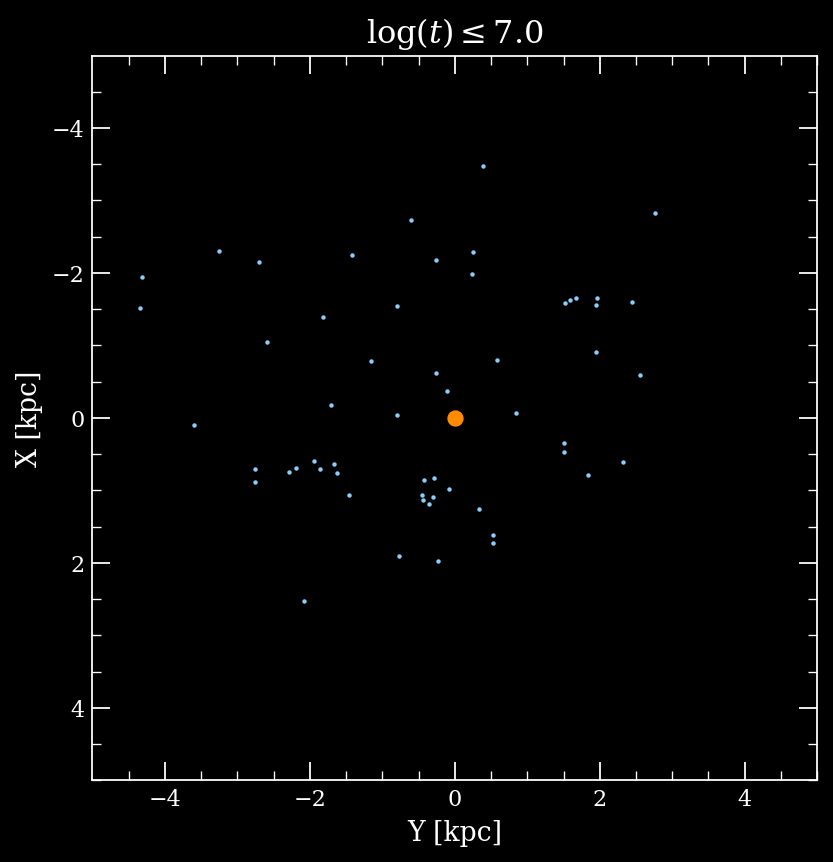

In [ ]:
# log(t)< 7
fig = plt.figure(figsize = (8,6), facecolor='k', dpi=160)
plt.axis('square')

plt.scatter(dias_sel.Y[dias_sel.Age<=7.],
           dias_sel.X[dias_sel.Age<=7.], # Estos son los cúmulos más jóvenes, que todavía tienen estrellas masivas
           c = 'lightskyblue', s = 1)
plt.xlim(-5, 5) 
plt.ylim(5, -5)

plt.scatter(0, 0, c = 'darkorange', s = 40, label='Sol')  # agrega un punto para mostrar el sol
plt.scatter(0, X0, c = 'C4', s = 40, label='Centro Galáctico')  # agrega un punto para mostrar el Centro Galáctico

plt.title('$\log(t) \leq 7.0$')
plt.xlabel('Y [kpc]')
plt.ylabel('X [kpc]')
# Sabemos que los cúmulos jóvenes son trazadores de los brazos espirales. Luego en este gráfico se tienen que ver el brazo de sagitario/carina,
# el local y el de perseo (de abajo para arriba)
plt.show()

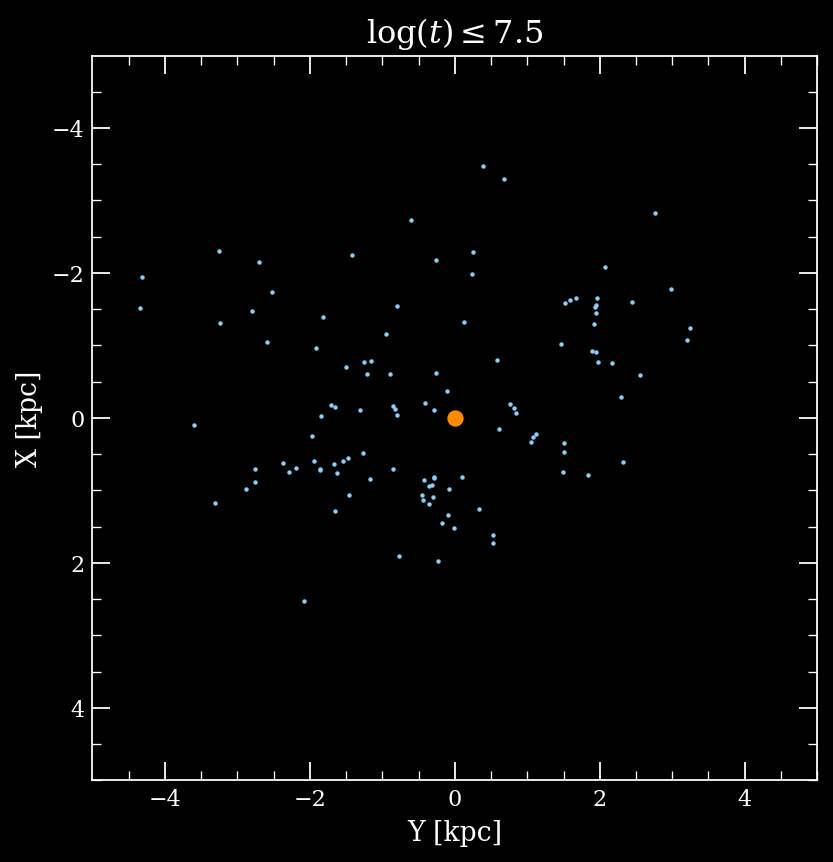

In [24]:
# log(t)< 7.5
fig = plt.figure(figsize = (8,6), facecolor='k', dpi=160)
plt.axis('square')

plt.scatter(dias_sel.Y[dias_sel.Age<=7.5], dias_sel.X[dias_sel.Age<=7.5], c = 'lightskyblue', s = 1)
plt.xlim(-5, 5) 
plt.ylim(5, -5)

plt.scatter(0, 0, c = 'darkorange', s = 40, label='Sol')

plt.title('$\log(t) \leq 7.5$')
plt.xlabel('Y [kpc]')
plt.ylabel('X [kpc]')

plt.show()

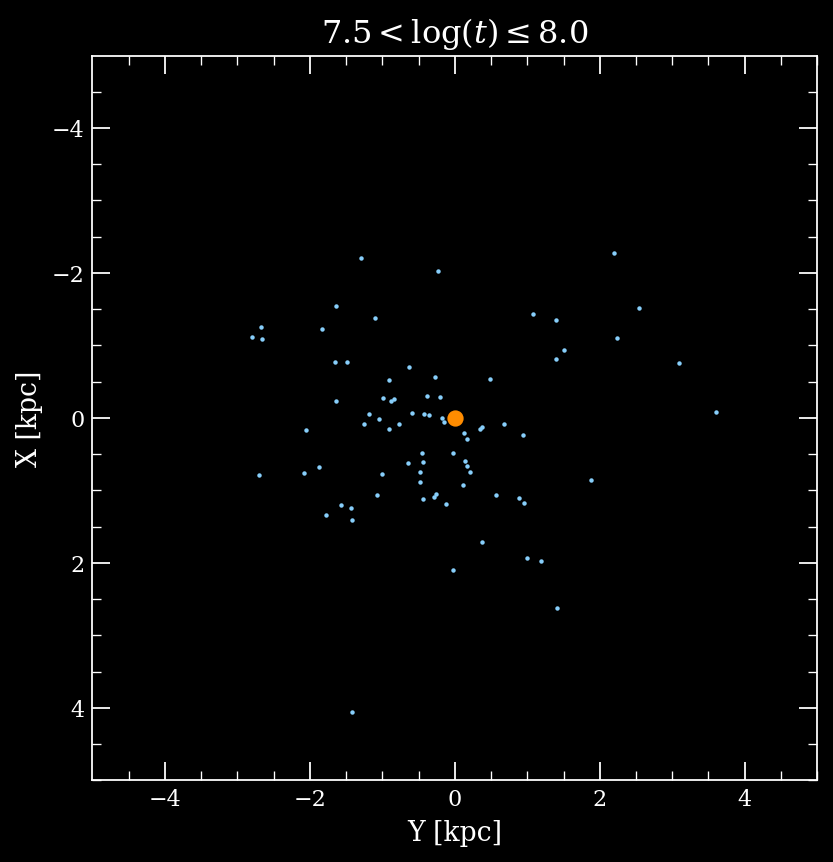

In [25]:
# 7.5 < log(t)< 8.0
fig = plt.figure(figsize = (8,6), facecolor='k', dpi=160)
plt.axis('square')

plt.scatter(dias_sel.Y[(dias_sel.Age>7.5)&(dias_sel.Age<=8.0)],
            dias_sel.X[(dias_sel.Age>7.5)&(dias_sel.Age<=8.0)], c = 'lightskyblue', s = 1)
plt.xlim(-5, 5) 
plt.ylim(5, -5)

plt.scatter(0, 0, c = 'darkorange', s = 40, label='Sol')

plt.title('$7.5< \log(t) \leq 8.0$')
plt.xlabel('Y [kpc]')
plt.ylabel('X [kpc]')

plt.show()

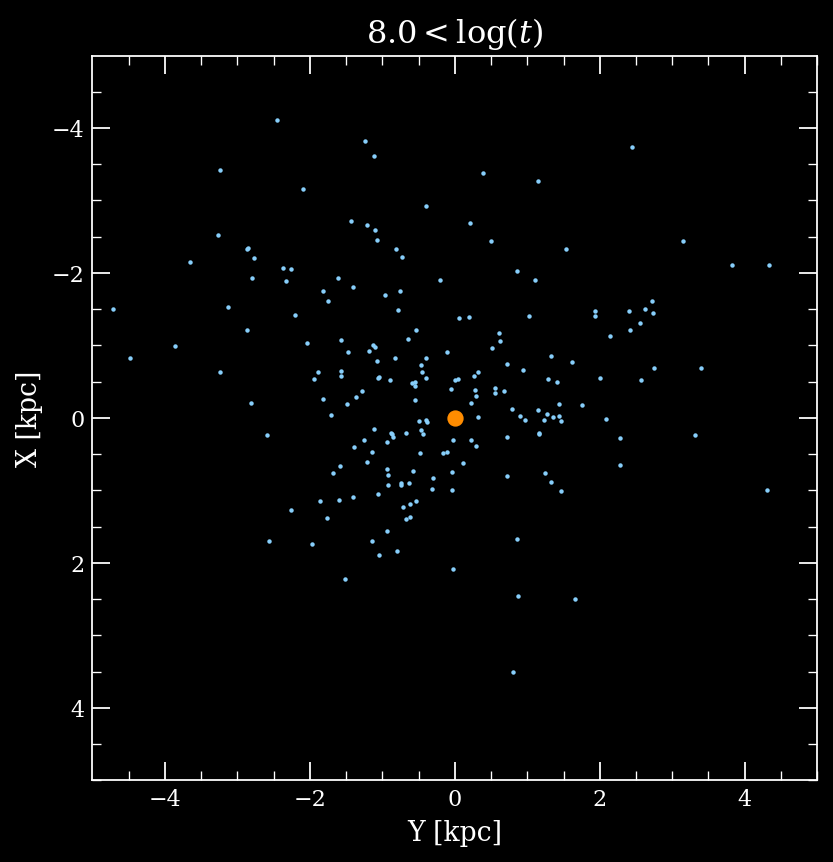

In [26]:
# log(t)> 8.0
fig = plt.figure(figsize = (8,6), facecolor='k', dpi=160)
plt.axis('square')

plt.scatter(dias_sel.Y[dias_sel.Age>8.], dias_sel.X[dias_sel.Age>8.], c = 'lightskyblue', s = 1)
plt.xlim(-5, 5) 
plt.ylim(5, -5)

plt.scatter(0, 0, c = 'darkorange', s = 40, label='Sol')

plt.title('$8.0 < \log(t)$')
plt.xlabel('Y [kpc]')
plt.ylabel('X [kpc]')

plt.show()

#### 2. c) Calcule la distancia galactocéntrica $R$ de cada cúmulo abierto al centro galáctico y grafique las metalicidades en función de $R$. Use distintos símbolos y/o colores para los cúmulos con diferentes rangos de edades:
\begin{eqnarray}
       & \log (t) & \le 7.25 \\
7.25 < & \log (t) & \le 8.0 \\
8.0 <  & \log (t) & \le 9.0  \\
9.0 <  & \log (t) & \\
\end{eqnarray}
    
#### Describa este gráfico, tratando de relacionar la distribución espacial de los cúmulos abiertos con sus edades y    metalicidades.

In [27]:
dias_sel['R']=np.sqrt(X0**2 + (dias_sel.d/1000.)**2 - 2*X0*dias_sel.d * np.cos(dias_sel.l)/1000.)
dias_sel.describe()

,l,b,d,Age,FeH,eFeH,X,Y,Z,R
count,391.000000,391.000000,391.000000,389.000000,160.000000,145.000000,391.000000,391.000000,391.000000,391.000000
mean,206.066602,-0.924936,1849.097187,8.012951,-0.081038,0.083124,-0.287108,-0.296545,-0.016191,8.123555
std,95.367581,7.493238,1039.058941,0.824702,0.230152,0.069828,1.298407,1.616817,0.191162,1.477759
min,7.085890,-79.261180,161.000000,6.000000,-1.544000,0.002000,-4.110151,-4.710831,-1.378651,3.750913
25%,121.989615,-2.402360,1032.000000,7.368000,-0.170000,0.030000,-1.165233,-1.403518,-0.072653,7.171985
50%,228.414610,-0.490080,1696.000000,8.036000,-0.019000,0.070000,-0.180863,-0.436155,-0.012753,8.077522
75%,286.223040,1.186495,2490.000000,8.600000,0.060000,0.110000,0.705117,0.797844,0.032965,9.033004
max,359.738130,31.896260,4950.000000,10.000000,0.445000,0.556000,4.057659,4.337530,0.859831,12.605251


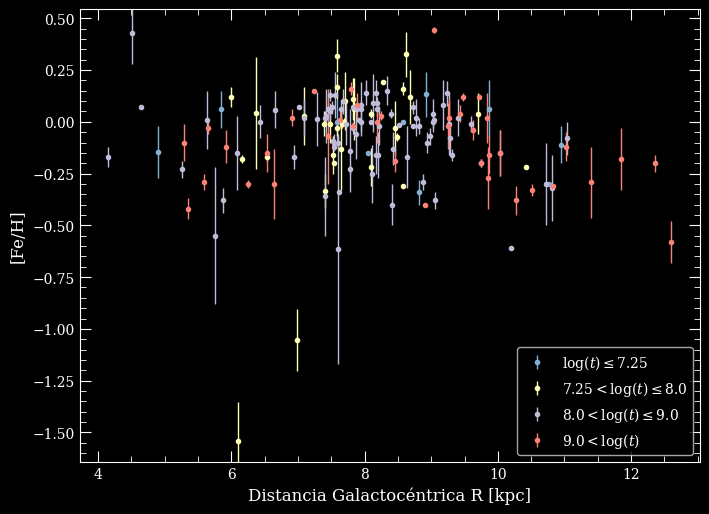

In [28]:
fig = plt.figure(figsize = (8,6), dpi = 100, facecolor='k')
plt.errorbar(dias_sel.R[dias_sel.Age<=7.25],dias_sel.FeH[dias_sel.Age<=7.25],
            yerr = dias_sel.eFeH[dias_sel.Age<=7.25], elinewidth=1, fmt = '.', color = 'C4', label = '$\log (t) \leq 7.25$')

plt.errorbar(dias_sel.R[(dias_sel.Age>7.25)&(dias_sel.Age<=8.)],dias_sel.FeH[(dias_sel.Age>7.25)&(dias_sel.Age<=8.)],
            yerr = dias_sel.eFeH[(dias_sel.Age>7.25)&(dias_sel.Age<=8.)], elinewidth=1, fmt = '.', color = 'C1', label = '$7.25 < \log (t) \leq 8.0$')

plt.errorbar(dias_sel.R[(dias_sel.Age>8.)&(dias_sel.Age<=9.)],dias_sel.FeH[(dias_sel.Age>8.)&(dias_sel.Age<=9.)],
            yerr = dias_sel.eFeH[(dias_sel.Age>8.)&(dias_sel.Age<=9.)], elinewidth=1, fmt = '.', color = 'C2',label = '$8.0 < \log (t) \leq 9.0$')

plt.errorbar(dias_sel.R[dias_sel.Age>=9.],dias_sel.FeH[dias_sel.Age>=9.],
             yerr = dias_sel.eFeH[dias_sel.Age>=9.], elinewidth=1, fmt = '.', color = 'C3', label = '$9.0<\log (t)$')


plt.xlabel('Distancia Galactocéntrica R [kpc]')
plt.ylabel('[Fe/H]')
plt.legend(loc = 'lower right')
plt.show()